In [1]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

#%pdb

In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
sns.reset_orig()
matplotlib.rcParams.update({'font.size': 12})
from utils_write import loadfile, stack_weights, cr_calc

In [275]:
def layer_stats(res):
    lt_print = ""
    for layer in res['prune_weights']:
        z = (res['prune_weights'][layer] == 0).sum()
        t = res['prune_weights'][layer].size
        print ("{}: Sparsity: {:.2f}, w!=0: {}".format(layer, z/t * 100, t-z))
        lt_print += "& {} & {:.2f} & {} \\\\ \n".format(t, z/t*100, t-z)
    model = stack_weights(res['prune_weights'])
    model_z = (model == 0).sum()
    model_t = model.size
    print ('Model Sparsity: {:.1f}, w!=0: {}'.format(res['sparsity'], model_t - model_z))
    print ('Initial Accuracy: {:.1f}'.format(res['test_acc'][0]))
    print ('Final Accuracy : {:.1f}'.format(res['prune_acc']['test']))
    lt_print += "& {} & {:.1f} & {} \\\\".format(model_t, model_z/model_t*100, model_t-model_z)
    print (lt_print)

def print_fin(res):
    print("{:.1f} & {:.1f} & {:.1f} & {:.1f}".format(res['test_acc'][0], res['prune_acc']['test'], res['sparsity'], cr_calc(res)[6]['cr']))
    
def get_proportions(crdict):
    total = crdict['wb'] + crdict['ib'] + crdict['sb'] + crdict['cb']
    print ("Codebook: {:.1f}".format(100*(crdict['sb'] + crdict['cb'])/total))
    print ("Index: {:.1f}".format(100*crdict['ib']/total))
    print ("Weights: {:.1f}".format(100*crdict['wb']/total))

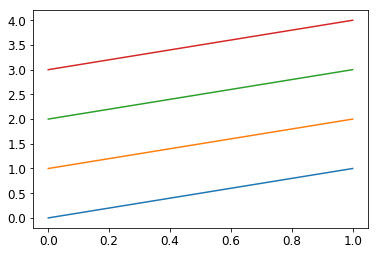

In [229]:
x=0
bl = plt.plot([x,x+1])
x+=1
ol = plt.plot([x,x+1])
x+=1
gl = plt.plot([x,x+1])
x+=1
rl = plt.plot([x,x+1])

b = bl[0].get_color()
o = ol[0].get_color()
g = gl[0].get_color()
r = rl[0].get_color()

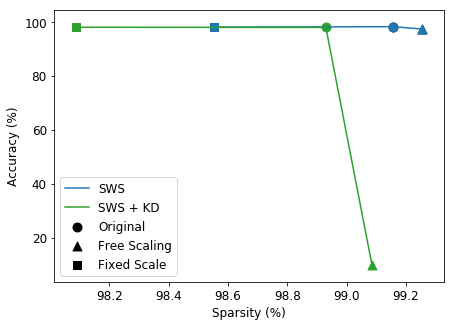

In [291]:
#SWS
#SWS w/ Scale
#SWS w/ Scale fixed
dset = "mnist"
model = "SWSModel"
model = "LeNet_300_100"





#SWS KD
#SWS KD w/ Scale
#SWS KD w/ Scale fixed
if (model == "LeNet_300_100"):
    swsr = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, model, scaling=False, model_save_dir = "./files", dset = dset)
    swssr = loadfile(1, 0.1, 1000, 1000, 2e-6, int(0), 16, model, scaling=True, model_save_dir = "./files", dset = dset)
    swssfr = loadfile(1, 0.1, 1000, 1000, 2e-6, int(0), 16, model, scaling=True, model_save_dir = "./files", fn="_S0", dset = dset)
    kdr = loadfile(250, 10, 2500, 1250, 1e-6, 5, 16, model, model_save_dir = "./files", scaling=False, fn = "_MSE", dset = dset)
    kdsr = loadfile(250, 10, 2500, 1250, 2e-6, 4, 16, model, model_save_dir = "./files", scaling=True, fn = "_MSE", dset = dset)
    kdsfr = loadfile(250, 10, 2500, 1250, 2e-6, 4, 16, model, model_save_dir = "./files", scaling=True, fn = "_MSE_S0", dset = dset)

else:
    swsr = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, model, scaling=False, model_save_dir = "../sws/files", dset = dset)
    swssr = loadfile(1, 0.1, 1000, 1000, 2e-6, int(0), 16, model, scaling=True, model_save_dir = "./files", dset = dset)
    swssfr = loadfile(1, 0.1, 1000, 1000, 2e-6, int(0), 16, model, scaling=True, model_save_dir = "./files", fn="_S0", dset = dset)
    kdr = loadfile(250, 10, 2500, 1250, 2e-7, 3, 16, model, model_save_dir = "./files", scaling=False, fn = "_MSE", dset = dset)
    kdsr = loadfile(250, 10, 2500, 1250, 2e-7, 4, 16, model, model_save_dir = "./files", scaling=True, fn = "_MSE", dset = dset)
    kdsfr = loadfile(250, 10, 2500, 1250, 2e-7, 4, 16, model, model_save_dir = "./files", scaling=True, fn = "_MSE_S0", dset = dset)
s_exp = pd.DataFrame(columns = ["method", "acc", "sp"])
s_exp.loc[0] = (["sws", swsr["prune_acc"]["test"], swsr["sparsity"]])
s_exp.loc[1] = (["swss", swssr["prune_acc"]["test"], swssr["sparsity"]])
s_exp.loc[2] = (["swssf", swssfr["prune_acc"]["test"], swssfr["sparsity"]])
s_exp.loc[3] = (["kd", kdr["prune_acc"]["test"], kdr["sparsity"]])
s_exp.loc[4] = (["kds", kdsr["prune_acc"]["test"], kdsr["sparsity"]])
s_exp.loc[5] = (["kdsf", kdsfr["prune_acc"]["test"], kdsfr["sparsity"]])

s = s_exp.query("method == \'sws\'")
ss = s_exp.query("method == \'swss\'")
ssf = s_exp.query("method == \'swssf\'")
kd = s_exp.query("method == \'kd\'")
kds = s_exp.query("method == \'kds\'")
kdsf = s_exp.query("method == \'kdsf\'")

plt.figure(figsize=(7,5))
sz=80
### Building Legend
plt.scatter(s['sp'], s['acc'],  color = 'k', marker = 'o', label = "Original", s=sz)
plt.scatter(ss['sp'], ss['acc'],  color = 'k', marker = '^', label = "Free Scaling", s=sz)
plt.scatter(ssf['sp'], ssf['acc'],  color = 'k', marker = 's', label = "Fixed Scale", s=sz)

#Plot lines
plt.plot([float(s['sp']), float(ss['sp'])], [float(s['acc']), float(ss['acc'])], color = b, label = "SWS")
plt.plot([float(s['sp']), float(ssf['sp'])], [float(s['acc']), float(ssf['acc'])], color = b)
plt.plot([float(kd['sp']), float(kds['sp'])], [float(kd['acc']), float(kds['acc'])], color = g, label = "SWS + KD")
plt.plot([float(kd['sp']), float(kdsf['sp'])], [float(kd['acc']), float(kdsf['acc'])],color = g)

plt.legend(loc=3)

#Plot scatter
plt.scatter(s['sp'], s['acc'],  color = b, marker = 'o', label = "Original", s=sz)
plt.scatter(ss['sp'], ss['acc'], color = b, marker = '^', label = "Free Scaling", s=sz)
plt.scatter(ssf['sp'], ssf['acc'], color = b, marker = 's', label = "Fixed Scale", s=sz)

plt.scatter(kd['sp'], kd['acc'], color = g, marker = 'o', s=sz)
plt.scatter(kds['sp'], kds['acc'], color = g, marker = '^', s=sz)
plt.scatter(kdsf['sp'], kdsf['acc'], color = g, marker = 's', s=sz)

plt.ylabel('Accuracy (%)')
plt.xlabel('Sparsity (%)')

if ("SWS" in model):
    plt.savefig('figs/scalesws.eps', format='eps', dpi=1000, bbox_inches='tight')
else:
    plt.savefig('figs/scaleln.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.show()

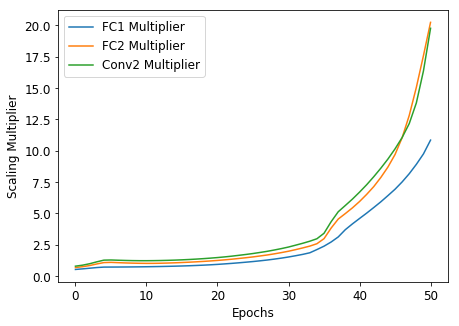

In [288]:
highlr = loadfile(250, 10, 2500, 1250, 2e-7, 4, 16, "SWSModel", model_save_dir = "./files", scaling=True, fn = "_MSE", dset = dset)
#plt.plot(highlr['scale'][:,0], label = "Conv2 Multiplier")
plt.figure(figsize=(7,5))
plt.plot(highlr['scale'][:,1], label = "FC1 Multiplier")
plt.plot(highlr['scale'][:,2], label = "FC2 Multiplier")
plt.plot(highlr['scale'][:,0], label = "Conv2 Multiplier")
plt.xlabel("Epochs")
plt.ylabel("Scaling Multiplier")
plt.savefig('figs/scaleswslayer.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.legend()

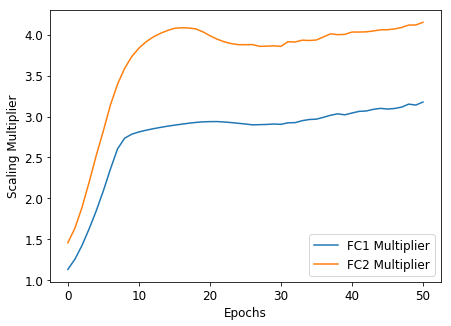

In [292]:
with open("./files/mnist_retrain_res_LeNet_300_100_m250_zm2500_r50_t2e-06_m16_kdT4_s_full_MSE_LNLR.p", "rb") as f:
    scres = pickle.load(f)
plt.figure(figsize=(7,5))
plt.plot(scres['scale'][:,0], label = "FC1 Multiplier")
plt.plot(scres['scale'][:,1], label = "FC2 Multiplier")
plt.xlabel("Epochs")
plt.ylabel("Scaling Multiplier")
#plt.savefig('figs/scalelnlayer.eps', format='eps', dpi=1000, bbox_inches='tight')
plt.legend()

### Init std dev

In [253]:
dev = {}
for layer in sws['init_weights']:
    dev[layer] = np.std(sws['init_weights'][layer])

for layer in dev:
    print ("{:.2f} & {:.2f} \\\\".format(dev[layer], dev[layer]/dev['conv1']))

0.30 & 1.00 \\
0.23 & 0.78 \\
0.16 & 0.52 \\
0.20 & 0.67 \\


### Fin Res

In [282]:
#SWS
print_fin(swssfr)
print_fin(kdsfr)

99.1 & 98.0 & 98.6 & 124.3
98.9 & 98.0 & 98.1 & 103.8


In [284]:
#LeNet
print_fin(swssfr)
print_fin(kdsfr)

98.4 & 96.9 & 98.0 & 101.0
98.4 & 97.1 & 98.3 & 107.7


In [ ]:
98.4 & 96.9 & 98.0 & 101.0 & 98.4 & 97.1 & 98.3 & 107.7 \\
99.1 & 98.0 & 98.6 & 124.3 & 98.9 & 98.0 & 98.1 & 103.8 \\

### LeNet Pattern

In [294]:
ln_exp = pd.DataFrame(columns = ["method", "acc", "sp"])
idx=0
ln_taul = [5e-7, 8e-7, 1e-6, 5e-6, 8e-6]
for tau in ln_taul:
    res = loadfile(1, 0.1, 1000, 1000, tau, int(0), 16, "LeNet_300_100", scaling = True, model_save_dir = "./files", fn="_S0")
    ln_exp.loc[idx] = (["sws", res["prune_acc"]["test"], res["sparsity"]])
    idx+=1
    res = loadfile(250, 10, 2500, 1250,  tau, 4,  16, "LeNet_300_100", scaling = True, model_save_dir = "./files", fn = "_MSE_S0")
    ln_exp.loc[idx] = (["sws kd", res["prune_acc"]["test"], res["sparsity"]])
    idx+=1

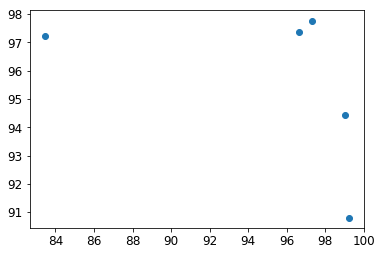

In [299]:
f = ln_exp.query('method == \'sws kd\'')
plt.scatter(f['sp'], f['acc'])

### FashionMNIST

In [305]:
fmnist_ln = loadfile(250, 10, 2500, 1250, 1.3e-6, 5, 16, "LeNet_300_100", scaling = True, model_save_dir = "./files", dset = 'fashionmnist', fn = "_MSE_S0")
fmnist_sws = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "SWSModel",scaling = True, model_save_dir = "./files", dset = 'fashionmnist')

FileNotFoundError: [Errno 2] No such file or directory: './files/fashionmnist_retrain_res_LeNet_300_100_m250_zm2500_r50_t2e-06_m16_kdT5_s_full_MSE_S0.p'

In [303]:
print_fin(fmnist_ln)

89.8 & 30.6 & 79.9 & 15.5


In [304]:
print_fin(fmnist_sws)

90.2 & 89.3 & 97.0 & 82.3
